In [1]:
from enum import Enum
import re

# Update players' elo
def update_elos(player1, player2, score, K=20):
    # score = 1 if player 1 wins
    #       = 0 if player 2 wins
    expected_score = 1 / (1 + 10 ** ((player1['elo'] - player2['elo']) / 400))
    
    player1['elo'] += K * (score - expected_score)
    player2['elo'] += K * (1 - score - expected_score)
    
ParsingState = Enum('ParsingState', ['START_ITER', 'START_PIT', 'END_PIT'])

i = 0
state = None
best_agent = {'iter': 0, 'elo': -4000.0, 'parent': None}
current_agent = None
agents = [best_agent]
with open('../temp/log.txt') as log:
    lines = log.readlines()
    for line in lines:
        if 'Coach INFO Starting Iter #' in line:
            state = ParsingState.START_ITER
            m = re.search('Coach INFO Starting Iter #(.+?) ...', line)
            current_agent = {'iter': int(m.group(1)), 'elo': best_agent['elo'], 'parent': best_agent['iter']}
        elif 'Coach INFO PITTING AGAINST PREVIOUS VERSION' in line:
            state = ParsingState.START_PIT
        elif 'Coach INFO NEW/PREV WINS :' in line:
            state = ParsingState.END_PIT
            agents.append(current_agent)
            
        if state == ParsingState.END_PIT:
            if 'ACCEPTING NEW MODEL' in line:
                best_agent = current_agent
                
        if state == ParsingState.START_PIT:
            # Player 1 is the previous best agent.
            # Player 2 is the current agent.
            if 'Player1 wins!' in line:
                update_elos(best_agent, current_agent, 1)
            
            if 'Player2 wins!' in line:
                update_elos(best_agent, current_agent, 0)

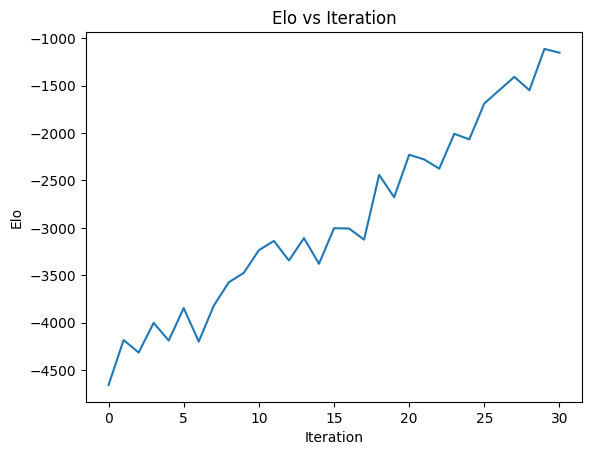

In [2]:
import matplotlib.pyplot as plt

iters = [agent['iter'] for agent in agents]
elos = [agent['elo'] for agent in agents]
  
plt.plot(iters, elos)
plt.title('Elo vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Elo')
plt.show()